#Actividad 1: Clustering de Civilizaciones

La teoría de civilizaciones de Samuel Huntington plantea como hipótesis que el mayor nivel de identificación cultural de una persona está dado por la civilización a la que pertenece. Citando el artículo de 1993 de Huntington:

> *Los Estados-nación seguirán siendo los actores más poderosos del panorama internacional, pero los principales conflictos de la política global ocurrirán entre naciones y grupos de naciones pertenecientes a diferentes civilizaciones. El choque de civilizaciones dominará la política global. Las fallas entre las civilizaciones serán los frentes de batalla del futuro.*

Aplicando la hipótesis de Huntington, se pueden explicar varios de los conflictos mundiales más recientes. Por ejemplo, el libro predijo como inminente un conflicto entre Rusia y Ucrania originado por la coexistencia fuerzas occidentales y ortodoxas dentro del Ucrania.


A continuación, se presenta un mapamundi que visualiza la división de los países entre civilizaciones.

<br>
<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Civilizations_map.png/750px-Civilizations_map.png" width="400"/>

Fuente: https://es.wikipedia.org/wiki/Choque_de_civilizaciones

</center>

## ¿Cuál es tu tarea?
En esta actividad deberás identificar clusters que representen una cantidad *n* de civilizaciones del mundo y evaluar la "calidad" de los clusters encontrados. Dada con una base de datos con información que describe a distintos países del mundo, deberás utilizar el algoritmo de clustering aglomerativo para encontrar la mejor división de los países a través de una búsqueda de hiperparámetros. Luego realizarás una reducción de dimensionalidad que usarás para visualizar la mejor combinación y finalmente pondrás a prueba los algoritmos KMeans y MiniBatchKMeans.

## Descripción dataset

El *dataset* a utilizar proviene de [World Values Survey](https://www.worldvaluessurvey.org/wvs.jsp), una organización que desde los años 80 realiza encuentas valóricas en distintos países. Trabajaremos con los datos de 81 países recolectados entre 2017 y 2020. En total son 231 preguntas, teniendo cada una distintas respuestas. Cada una de estas respuestas representa a una de las 768 columnas del *dataset*. Por ejemplo, la pregunta `A001` es `Important in life: Family`, la cual es respondida entre los valores 1 y 4. Así, por ejemplo, en Argentina cerca del 91% de las personas responden 1 a esa pregunda (`A001_1`), mientras que el 0% responde con 4. Los temas de las preguntas son variados, entre los que se encuentran las posiciones de las personas de cada país frente a temas como el aborto, la importancia de la religión, el sentimiento de felicidad, la confianza en el gobierno y la valoración de la democracia. De esta forma, describimos a cada pais en función de 768 valores.

# [0.5 ptos] Parte 1: Carga y preprocesamiento
Carga la base de datos que se encuentra en el link, puedes utilizar la función [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) de `pandas`. Utiliza como identificador de cada fila el nombre de cada pais con el argumento `index_col`.

In [1]:
import pandas as pd

In [2]:
url = 'https://drive.google.com/uc?id=1_wiSDk4zy2dJf0ZzJaLslz3IVkruq_wZ'
df = pd.read_csv(url)
df = df.rename(columns={'CNTRYCOW': 'index_col'})
df.head()

,index_col,A001_1,A001_2,A001_3,A001_4,A002_1,A002_2,A002_3,A002_4,A003_1,...,H010_1,H010_2,H010_3,H010_4,H011_1,H011_2,H011_3,H011_4,G027A_1,G027A_2
0,Albania,0.981092,0.017507,0.001401,0.000000,0.355944,0.562937,0.072028,0.009091,0.182517,...,0.104167,0.203305,0.160201,0.532328,0.135908,0.204578,0.153791,0.505722,0.995816,0.004184
1,Andorra,0.895418,0.096614,0.004980,0.002988,0.548805,0.374502,0.068725,0.007968,0.629482,...,0.036853,0.063745,0.173307,0.726096,0.041874,0.086740,0.127617,0.743769,0.276892,0.723108
2,Argentina,0.909272,0.089731,0.000997,0.000000,0.568295,0.339980,0.073779,0.017946,0.373373,...,0.074035,0.188738,0.215850,0.521376,0.136698,0.227129,0.208202,0.427971,0.979063,0.020937
3,Armenia,0.898599,0.094730,0.004670,0.002001,0.395194,0.482644,0.110814,0.011348,0.272605,...,0.156504,0.277100,0.275745,0.290650,0.195946,0.289189,0.247297,0.267568,0.963333,0.036667
4,Australia,0.907377,0.077094,0.013311,0.002219,0.566818,0.389015,0.041903,0.002265,0.426538,...,0.075851,0.247630,0.367540,0.308979,0.104619,0.229827,0.303840,0.361714,0.928453,0.071547


A continuación, realiza una normalización *Min-max* de los datos.

Normalizaremos todas las columnas menos index_col

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.loc[:, 'A001_1':] = scaler.fit_transform(df.loc[:, 'A001_1':])
df = pd.DataFrame(df)
df.head()

,index_col,A001_1,A001_2,A001_3,A001_4,A002_1,A002_2,A002_3,A002_4,A003_1,...,H010_1,H010_2,H010_3,H010_4,H011_1,H011_2,H011_3,H011_4,G027A_1,G027A_2
0,Albania,0.950982,0.050211,0.030890,0.000000,0.447730,0.748432,0.121600,0.132594,0.099209,...,0.169171,0.360490,0.211356,0.714106,0.275554,0.492497,0.130472,0.585101,0.994214,0.005786
1,Andorra,0.681331,0.330451,0.109838,0.169465,0.811137,0.251514,0.114190,0.116218,0.917585,...,0.039611,0.000000,0.240452,1.000000,0.072855,0.150411,0.058277,0.990905,0.000000,1.000000
2,Argentina,0.724935,0.306068,0.021990,0.000000,0.847863,0.160477,0.125527,0.261751,0.448659,...,0.111177,0.322864,0.334902,0.697948,0.277256,0.557964,0.280552,0.452555,0.971046,0.028954
3,Armenia,0.691342,0.323778,0.102995,0.113504,0.521688,0.536692,0.208615,0.165522,0.264157,...,0.269904,0.551108,0.467876,0.357525,0.404970,0.738125,0.388388,0.179112,0.949293,0.050707
4,Australia,0.718969,0.261301,0.293585,0.125822,0.845079,0.289785,0.054016,0.033036,0.546001,...,0.114671,0.474983,0.671671,0.384569,0.208106,0.565797,0.544348,0.339606,0.901056,0.098944


# [3 ptos] Parte 2: Clustering jerárquico aglomerativo

En esta parte deberás hacer clustering de los distintos paises y calcular el *silhouette score* de los distintos clusters que encuentres. El *silhouette score* es una medida que indica la "calidad" de los clusters  encontrados al comparar que tan similar son los objetos de los clusters con la separación que tienen con los objetos de los otros clusters.

En particular deberas hacer lo siguiente:
1. Con la función [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) de `sklearn` deberás encontrar *n* clusters con distinas métricas de distancia y criterios de enlace. 

    - El valor de *n* debe ir entre 5 y 8
    - Las métricas de distancia son *euclidean*, *manhattan* y *cosine*
    - Los criterios de enlace son *complete*, *average* y *single*

  Por lo tanto, se harán un total de 4 x 3 x 3 = 36 aglomeraciones distintas

2. Con la función [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) de `sklearn`, calcula el *silhouette score* (valga la redundancia) de los clusters que vayas encontrando. 

3. Finalmente, ordena tus resultados de forma descendente e indica cuál fue la mejor configuración. ¿Qué métrica de distancia tiene mejores resultados? 

In [4]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Realiza las distintas configuraciones de clustering aquí
hac_5_e_c = AgglomerativeClustering(n_clusters = 5, 
                             affinity = "euclidean",
                             linkage = "complete")
hac_6_e_c = AgglomerativeClustering(n_clusters = 6, 
                             affinity = "euclidean",
                             linkage = "complete")
hac_7_e_c = AgglomerativeClustering(n_clusters = 7, 
                             affinity = "euclidean",
                             linkage = "complete")
hac_8_e_c = AgglomerativeClustering(n_clusters = 8, 
                             affinity = "euclidean",
                             linkage = "complete")

hac_5_m_c = AgglomerativeClustering(n_clusters = 5, 
                             affinity = "manhattan",
                             linkage = "complete")
hac_6_m_c = AgglomerativeClustering(n_clusters = 6, 
                             affinity = "manhattan",
                             linkage = "complete")
hac_7_m_c = AgglomerativeClustering(n_clusters = 7, 
                             affinity = "manhattan",
                             linkage = "complete")
hac_8_m_c = AgglomerativeClustering(n_clusters = 8, 
                             affinity = "manhattan",
                             linkage = "complete")

hac_5_c_c = AgglomerativeClustering(n_clusters = 5, 
                             affinity = "cosine",
                             linkage = "complete")
hac_6_c_c = AgglomerativeClustering(n_clusters = 6, 
                             affinity = "cosine",
                             linkage = "complete")
hac_7_c_c = AgglomerativeClustering(n_clusters = 7, 
                             affinity = "cosine",
                             linkage = "complete")
hac_8_c_c = AgglomerativeClustering(n_clusters = 8, 
                             affinity = "cosine",
                             linkage = "complete")
####
hac_5_e_a = AgglomerativeClustering(n_clusters = 5, 
                             affinity = "euclidean",
                             linkage = "average")
hac_6_e_a = AgglomerativeClustering(n_clusters = 6, 
                             affinity = "euclidean",
                             linkage = "average")
hac_7_e_a = AgglomerativeClustering(n_clusters = 7, 
                             affinity = "euclidean",
                             linkage = "average")
hac_8_e_a = AgglomerativeClustering(n_clusters = 8, 
                             affinity = "euclidean",
                             linkage = "average")

hac_5_m_a = AgglomerativeClustering(n_clusters = 5, 
                             affinity = "manhattan",
                             linkage = "average")
hac_6_m_a = AgglomerativeClustering(n_clusters = 6, 
                             affinity = "manhattan",
                             linkage = "average")
hac_7_m_a = AgglomerativeClustering(n_clusters = 7, 
                             affinity = "manhattan",
                             linkage = "average")
hac_8_m_a = AgglomerativeClustering(n_clusters = 8, 
                             affinity = "manhattan",
                             linkage = "average")

hac_5_c_a = AgglomerativeClustering(n_clusters = 5, 
                             affinity = "cosine",
                             linkage = "average")
hac_6_c_a = AgglomerativeClustering(n_clusters = 6, 
                             affinity = "cosine",
                             linkage = "average")
hac_7_c_a = AgglomerativeClustering(n_clusters = 7, 
                             affinity = "cosine",
                             linkage = "average")
hac_8_c_a = AgglomerativeClustering(n_clusters = 8, 
                             affinity = "cosine",
                             linkage = "average")
####

hac_5_e_s = AgglomerativeClustering(n_clusters = 5, 
                             affinity = "euclidean",
                             linkage = "single")
hac_6_e_s = AgglomerativeClustering(n_clusters = 6, 
                             affinity = "euclidean",
                             linkage = "single")
hac_7_e_s = AgglomerativeClustering(n_clusters = 7, 
                             affinity = "euclidean",
                             linkage = "single")
hac_8_e_s = AgglomerativeClustering(n_clusters = 8, 
                             affinity = "euclidean",
                             linkage = "single")

hac_5_m_s = AgglomerativeClustering(n_clusters = 5, 
                             affinity = "manhattan",
                             linkage = "single")
hac_6_m_s = AgglomerativeClustering(n_clusters = 6, 
                             affinity = "manhattan",
                             linkage = "single")
hac_7_m_s = AgglomerativeClustering(n_clusters = 7, 
                             affinity = "manhattan",
                             linkage = "single")
hac_8_m_s = AgglomerativeClustering(n_clusters = 8, 
                             affinity = "manhattan",
                             linkage = "single")

hac_5_c_s = AgglomerativeClustering(n_clusters = 5, 
                             affinity = "cosine",
                             linkage = "single")
hac_6_c_s = AgglomerativeClustering(n_clusters = 6, 
                             affinity = "cosine",
                             linkage = "single")
hac_7_c_s = AgglomerativeClustering(n_clusters = 7, 
                             affinity = "cosine",
                             linkage = "single")
hac_8_c_s = AgglomerativeClustering(n_clusters = 8, 
                             affinity = "cosine",
                             linkage = "single")

# A AgglomerativeClustering le puedes indicar los argumentos con n_clusters, affinity y linkage
# A silhouette_score debes entregarle la base de datos y los clusters al que pertenecen los datos

In [5]:
print(hac_5_e_c)

AgglomerativeClustering(linkage='complete', n_clusters=5)


Realizamos fit con todos, despues sacamos las labels y comparamos 

In [6]:
cluster_5_e_c = hac_5_e_c.fit(df.loc[:, 'A001_1':])
cluster_6_e_c = hac_6_e_c.fit(df.loc[:, 'A001_1':])
cluster_7_e_c = hac_7_e_c.fit(df.loc[:, 'A001_1':])
cluster_8_e_c = hac_8_e_c.fit(df.loc[:, 'A001_1':])

cluster_5_m_c = hac_5_m_c.fit(df.loc[:, 'A001_1':])
cluster_6_m_c = hac_6_m_c.fit(df.loc[:, 'A001_1':])
cluster_7_m_c = hac_7_m_c.fit(df.loc[:, 'A001_1':])
cluster_8_m_c = hac_8_m_c.fit(df.loc[:, 'A001_1':])

cluster_5_c_c = hac_5_c_c.fit(df.loc[:, 'A001_1':])
cluster_6_c_c = hac_6_c_c.fit(df.loc[:, 'A001_1':])
cluster_7_c_c = hac_7_c_c.fit(df.loc[:, 'A001_1':])
cluster_8_c_c = hac_8_c_c.fit(df.loc[:, 'A001_1':])

####

cluster_5_e_a = hac_5_e_a.fit(df.loc[:, 'A001_1':])
cluster_6_e_a = hac_6_e_a.fit(df.loc[:, 'A001_1':])
cluster_7_e_a = hac_7_e_a.fit(df.loc[:, 'A001_1':])
cluster_8_e_a = hac_8_e_a.fit(df.loc[:, 'A001_1':])

cluster_5_m_a = hac_5_m_a.fit(df.loc[:, 'A001_1':])
cluster_6_m_a = hac_6_m_a.fit(df.loc[:, 'A001_1':])
cluster_7_m_a = hac_7_m_a.fit(df.loc[:, 'A001_1':])
cluster_8_m_a = hac_8_m_a.fit(df.loc[:, 'A001_1':])

cluster_5_c_a = hac_5_c_a.fit(df.loc[:, 'A001_1':])
cluster_6_c_a = hac_6_c_a.fit(df.loc[:, 'A001_1':])
cluster_7_c_a = hac_7_c_a.fit(df.loc[:, 'A001_1':])
cluster_8_c_a = hac_8_c_a.fit(df.loc[:, 'A001_1':])

####

cluster_5_e_s = hac_5_e_s.fit(df.loc[:, 'A001_1':])
cluster_6_e_s = hac_6_e_s.fit(df.loc[:, 'A001_1':])
cluster_7_e_s = hac_7_e_s.fit(df.loc[:, 'A001_1':])
cluster_8_e_s = hac_8_e_s.fit(df.loc[:, 'A001_1':])

cluster_5_m_s = hac_5_m_s.fit(df.loc[:, 'A001_1':])
cluster_6_m_s = hac_6_m_s.fit(df.loc[:, 'A001_1':])
cluster_7_m_s = hac_7_m_s.fit(df.loc[:, 'A001_1':])
cluster_8_m_s = hac_8_m_s.fit(df.loc[:, 'A001_1':])

cluster_5_c_s = hac_5_c_s.fit(df.loc[:, 'A001_1':])
cluster_6_c_s = hac_6_c_s.fit(df.loc[:, 'A001_1':])
cluster_7_c_s = hac_7_c_s.fit(df.loc[:, 'A001_1':])
cluster_8_c_s = hac_8_c_s.fit(df.loc[:, 'A001_1':])

In [7]:
labels_5_e_c = cluster_5_e_c.labels_
labels_6_e_c = cluster_6_e_c.labels_
labels_7_e_c = cluster_7_e_c.labels_
labels_8_e_c = cluster_8_e_c.labels_

labels_5_m_c = cluster_5_m_c.labels_
labels_6_m_c = cluster_6_m_c.labels_
labels_7_m_c = cluster_7_m_c.labels_
labels_8_m_c = hac_8_m_c.labels_

labels_5_c_c = cluster_5_c_c.labels_
labels_6_c_c = cluster_6_c_c.labels_
labels_7_c_c = cluster_7_c_c.labels_
labels_8_c_c = cluster_8_c_c.labels_

####

labels_5_e_a = cluster_5_e_a.labels_
labels_6_e_a = cluster_6_e_a.labels_
labels_7_e_a = cluster_7_e_a.labels_
labels_8_e_a = cluster_8_e_a.labels_

labels_5_m_a = cluster_5_m_a.labels_
labels_6_m_a = cluster_6_m_a.labels_
labels_7_m_a = cluster_7_m_a.labels_
labels_8_m_a = cluster_8_m_a.labels_

labels_5_c_a = cluster_5_c_a.labels_
labels_6_c_a = cluster_6_c_a.labels_
labels_7_c_a = cluster_7_c_a.labels_
labels_8_c_a = cluster_8_c_a.labels_

####

labels_5_e_s = cluster_5_e_s.labels_
labels_6_e_s = cluster_6_e_s.labels_
labels_7_e_s = cluster_7_e_s.labels_
labels_8_e_s = cluster_8_e_s.labels_

labels_5_m_s = cluster_5_m_s.labels_
labels_6_m_s = cluster_6_m_s.labels_
labels_7_m_s = cluster_7_m_s.labels_
labels_8_m_s = cluster_8_m_s.labels_

labels_5_c_s = cluster_5_c_s.labels_
labels_6_c_s = cluster_6_c_s.labels_
labels_7_c_s = cluster_7_c_s.labels_
labels_8_c_s = cluster_8_c_s.labels_

In [8]:
list_s = []

list_s.append({'name':'5_e_c', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_5_e_c)})
list_s.append({'name':'6_e_c', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_6_e_c)})
list_s.append({'name':'7_e_c', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_7_e_c)})
list_s.append({'name':'8_e_c', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_8_e_c)})

list_s.append({'name':'5_m_c', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_5_m_c)})
list_s.append({'name':'6_m_c', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_6_m_c)})
list_s.append({'name':'7_m_c', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_7_m_c)})
list_s.append({'name':'8_m_c', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_8_m_c)})

list_s.append({'name':'5_c_c', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_5_c_c)})
list_s.append({'name':'6_c_c', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_6_c_c)})
list_s.append({'name':'7_c_c', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_7_c_c)})
list_s.append({'name':'8_c_c', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_8_c_c)})

####

list_s.append({'name':'5_e_a', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_5_e_a)})
list_s.append({'name':'6_e_a', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_6_e_a)})
list_s.append({'name':'7_e_a', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_7_e_a)})
list_s.append({'name':'8_e_a', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_8_e_a)})

list_s.append({'name':'5_m_a', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_5_m_a)})
list_s.append({'name':'6_m_a', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_6_m_a)})
list_s.append({'name':'7_m_a', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_7_m_a)})
list_s.append({'name':'8_m_a', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_8_m_a)})

list_s.append({'name':'5_c_a', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_5_c_a)})
list_s.append({'name':'6_c_a', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_6_c_a)})
list_s.append({'name':'7_c_a', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_7_c_a)})
list_s.append({'name':'8_c_a', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_8_c_a)})

####

list_s.append({'name':'5_e_s', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_5_e_s)})
list_s.append({'name':'6_e_s', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_6_e_s)})
list_s.append({'name':'7_e_s', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_7_e_s)})
list_s.append({'name':'8_e_s', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_8_e_s)})

list_s.append({'name':'5_m_s', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_5_m_s)})
list_s.append({'name':'6_m_s', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_6_m_s)})
list_s.append({'name':'7_m_s', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_7_m_s)})
list_s.append({'name':'8_m_s', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_8_m_s)})

list_s.append({'name':'5_c_s', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_5_c_s)})
list_s.append({'name':'6_c_s', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_6_c_s)})
list_s.append({'name':'7_c_s', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_7_c_s)})
list_s.append({'name':'8_c_s', 'score':silhouette_score(df.loc[:, 'A001_1':], labels_8_c_s)})

In [9]:
sortlist = sorted(list_s, key=lambda d: d['score'], reverse=True)
print(sortlist)

[{'name': '8_m_c', 'score': 0.12706179250733676}, {'name': '7_m_c', 'score': 0.12363187461331135}, {'name': '5_m_c', 'score': 0.12157164547473526}, {'name': '6_m_c', 'score': 0.12118919497252906}, {'name': '5_c_c', 'score': 0.11985702994684326}, {'name': '7_c_c', 'score': 0.11950936567678826}, {'name': '8_c_c', 'score': 0.118252279657837}, {'name': '6_c_c', 'score': 0.11657731286399847}, {'name': '8_c_a', 'score': 0.11373931763706625}, {'name': '5_c_a', 'score': 0.11181601533128617}, {'name': '7_c_a', 'score': 0.11112805192072257}, {'name': '8_e_c', 'score': 0.11016003015773997}, {'name': '8_e_a', 'score': 0.1094614870657514}, {'name': '6_c_a', 'score': 0.1089056858912223}, {'name': '7_e_c', 'score': 0.10603903689228336}, {'name': '6_e_c', 'score': 0.10370897003491945}, {'name': '6_e_a', 'score': 0.10327312863584084}, {'name': '8_m_a', 'score': 0.10293943196146241}, {'name': '5_e_a', 'score': 0.09924014882221865}, {'name': '7_e_a', 'score': 0.09749281522278999}, {'name': '5_m_a', 'scor

Podemos apreciar que el valor más cercano a 1 fue 0.12706179250733676. Este valor fue obtenido con n=8, métrica manhattan y método complete. Tambien tenemos todos los otros métodos ordenados por puntaje. 

# [1.5 ptos] Parte 3: Reducción de dimensionalidad y visualización de Información

Reduce las 768 características a 2 dimensiones utilizando PCA. Guarda este resultado en un nuevo dataframe. Procura mantener los nombres de los países como índice. Grafica la mejor aglomeración encontrada en la parte anterior, utiliza como marca de color el cluster al que pertenece cada país. Comenta junto a qué países se encuentra Chile.

**OJO:** No debes encontrar nuevos clusters con el dataset de dos dimensiones, sino que en base a la mejor aglomeración ya encontrada, debes graficar el resultado. La reducción solo se hace para tener un espacio donde graficar.

Para esto puedes utilizar las librerías `matplotlib`, `seaborn` o `altair`.

In [25]:
from sklearn.decomposition import PCA

# Utiliza PCA(n_components=2) para reducir la dimensionalidad

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df.loc[:, 'A001_1':])

pca_n2 = pd.DataFrame(data = principalComponents
             , columns = ['component 1', 'component 2'])
pca_n2.head()

,component 1,component 2
0,-2.455278,-2.816516
1,3.283700,-1.686532
2,0.842133,0.260682
3,-2.025405,1.604845
4,4.176830,-1.656931


Se uso: (https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/)

Text(0.5, 1.0, 'Paises')

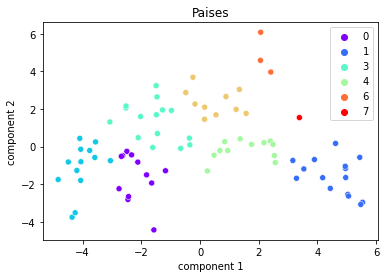

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

clustering_model_pca = hac_8_m_c
clustering_model_pca.fit(principalComponents)

data_labels_pca = clustering_model_pca.labels_

pca_n2['index_col'] = df['index_col']
sns.scatterplot(x= pca_n2['component 1'], 
                y= pca_n2['component 2'],
                hue=data_labels_pca,
                palette="rainbow").set_title('Paises')
# Grafica aquí el mejor cluster encontrado

In [42]:
for i in range(8):
    for j in pca_n2[data_labels_pca == i]['index_col']:
        if j == 'Chile':
            print(f'Chile pertenece al grupo {i}')
            print(f'Los paises del grupo {i} son:')
            print(pca_n2[data_labels_pca == i]['index_col'])


Chile pertenece al grupo 5
Los paises del grupo 5 son:
8        Belarus
14         Chile
15         China
44     Lithuania
63        Russia
65     Singapore
66      Slovakia
72    Taiwan ROC
77       Ukraine
79       Vietnam
Name: index_col, dtype: object


¿Junto a qué países se encuentra Chile?

Sorprende que Chile se encuentra con paises bastante conflictivos. Además son países en su mayoría en vías de desarrollo. Lo que me parecio curioso es que no este agrupado con ningún país latino.

# [1 pto] Parte 4: KMeans y MiniBatchKMeans
Realiza una búsqueda de hiperparámetros sobre la cantidad de clusters, siendo $n=\{5, 6, 7, 8\} $. Realiza esto para el algoritmo KMeans y MiniBatchKMeans. Para cada caso grafica el mejor resultado y comenta las diferencias con el algoritmo de clustering aglomerativo. ¿Cambian los vecinos con los que se ubica Chile?


In [13]:
from sklearn.cluster import KMeans, MiniBatchKMeans

kmeans_5 = KMeans(n_clusters=5, random_state = 1863955)
cluster_k_5 = kmeans_5.fit(df.loc[:, 'A001_1':])
labels_k_5 = cluster_k_5.labels_
print(silhouette_score(df.loc[:, 'A001_1':], labels_k_5))

kmeans_6 = KMeans(n_clusters=6, random_state = 1863955)
cluster_k_6 = kmeans_6.fit(df.loc[:, 'A001_1':])
labels_k_6 = cluster_k_6.labels_
print(silhouette_score(df.loc[:, 'A001_1':], labels_k_6))

kmeans_7 = KMeans(n_clusters=7, random_state = 1863955)
cluster_k_7 = kmeans_7.fit(df.loc[:, 'A001_1':])
labels_k_7 = cluster_k_7.labels_
print(silhouette_score(df.loc[:, 'A001_1':], labels_k_7))

kmeans_8 = KMeans(n_clusters=8, random_state = 1863955)
cluster_k_8 = kmeans_8.fit(df.loc[:, 'A001_1':])
labels_k_8 = cluster_k_8.labels_
print(silhouette_score(df.loc[:, 'A001_1':], labels_k_8))

###

mkmeans_5 = MiniBatchKMeans(n_clusters=5, random_state = 1863955)
cluster_mk_5 = mkmeans_5.fit(df.loc[:, 'A001_1':])
labels_mk_5 = cluster_mk_5.labels_
print(silhouette_score(df.loc[:, 'A001_1':], labels_mk_5))

mkmeans_6 = MiniBatchKMeans(n_clusters=6, random_state = 1863955)
cluster_mk_6 = mkmeans_6.fit(df.loc[:, 'A001_1':])
labels_mk_6 = cluster_mk_6.labels_
print(silhouette_score(df.loc[:, 'A001_1':], labels_mk_6))

mkmeans_7 = MiniBatchKMeans(n_clusters=7, random_state = 1863955)
cluster_mk_7 = mkmeans_7.fit(df.loc[:, 'A001_1':])
labels_mk_7 = cluster_mk_7.labels_
print(silhouette_score(df.loc[:, 'A001_1':], labels_mk_7))

mkmeans_8 = MiniBatchKMeans(n_clusters=8, random_state = 1863955)
cluster_mk_8 = mkmeans_8.fit(df.loc[:, 'A001_1':])
labels_mk_8 = cluster_mk_8.labels_
print(silhouette_score(df.loc[:, 'A001_1':], labels_mk_8))

# Reliza la búsqueda de hiperparámetros para cada uno de los algoritmos

0.1332221631982781
0.13287163580023736
0.12813866272696134
0.10350118712925443
0.12526958077359035
0.07083541166160572
0.0825080752163348
0.10140846658339633


Vemos que el más cercano a 1 es K-Means con n=5

Text(0.5, 1.0, 'Paises')

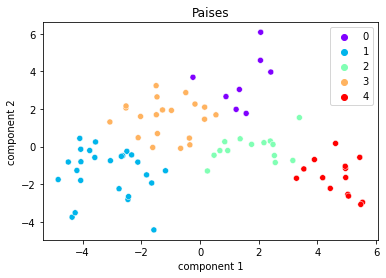

In [23]:
# Grafica los resultados
clustering_model_pca = kmeans_5

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df.loc[:, 'A001_1':])
pca_n2 = pd.DataFrame(data = principalComponents
             , columns = ['component 1', 'component 2'])

clustering_model_pca.fit(principalComponents)

data_labels_pca = clustering_model_pca.labels_

pca_n2['index_col'] = df['index_col']
sns.scatterplot(x= pca_n2['component 1'], 
                y= pca_n2['component 2'],
                hue=data_labels_pca,
                palette="rainbow").set_title('Paises')
# Grafica aquí el mejor cluster encontrado

Comenta los resultados respecto al clustering aglomerativo.

In [24]:
for i in range(6):
    for j in pca_n2[data_labels_pca == i]['index_col']:
        if j == 'Chile':
            print(f'Chile pertenece al grupo {i}')
            print(f'Los paises del grupo {i} son:')
            print(pca_n2[data_labels_pca == i]['index_col'])

Chile pertenece al grupo 3
Los paises del grupo 3 son:
3         Armenia
6      Azerbaijan
8         Belarus
12       Bulgaria
14          Chile
15          China
18         Cyprus
31      Guatemala
41     Kazakhstan
43        Lebanon
46        Malasia
48     Montenegro
57           Peru
58    Philippines
63         Russia
64         Serbia
73     Tajikistan
74       Thailand
76         Turkey
77        Ukraine
Name: index_col, dtype: object


Se repitieron algunos como Ucrania y Russia. También aparecen unos latinos como Peru y Guatemala. El número de paises es mayor debido a que hay menos clusters. Otra cosa que llamo mi atención es que los graficos de los dos métodos son similares